# Lab 2 Assignment

In [1]:
from google.colab import drive
drive.mount('/content/drive')

ModuleNotFoundError: No module named 'google'

In [ ]:
%cd "/content/drive/MyDrive/Labs/Lab2/jupyter"

# **Practical session 2: an image denoising energy**

## **1. Gradient descent**

In [1]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import os

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from IPython import display

### **1. Complete the MatLab functions toy_fun and toy_gradient. These functions implement the function f and its gradient.**

**toy_fun**

\begin{equation}
f(x_1,x_2) = \frac1{1000}\left(x_1^4 + x_2^4 - 80 x_1^2 - 60 x_2^2 + 100x_1 +
50 x_2 + 1\right)
\end{equation}

In [2]:
def toy_fun(x: np.matrix):
    """
    Polynomial toy function - see the guide
    
    :param x: 2x1 vector 
    
    :return y: value of the function at point x
    """
    # TODO: Compute the function
    y = (1/1000)*(np.power(x[0],4)+np.power(x[1],4)-80*np.power(x[0],2)-60*np.power(x[1],2)+100*x[0]+50*x[1]+1)
    return y
    "posa retornar un valor pero per aixo fem x[0,0] i llavors a toy_main dona error"
    "Preguntar també perque a toy_main, on es crida toy_gradient, perque no es passen parametres."

In [3]:
# TODO: function verification
x = np.matrix([[6],[2]])
toy_fun(x)

matrix([[-1.107]])

**toy_gradient**

We know that:

$$\nabla f(x_{1},x_{2}) =
\begin{bmatrix}
\dfrac{\partial f(x_{1},x_{2})}{\partial x_{1}}\\
\\
\dfrac{\partial f(x_{1},x_{2})}{\partial x_{2}}
\\
\end{bmatrix} =
\begin{bmatrix}
\frac1{1000}\left(4x_1^3 - 160 x_1 + 100\right)\\
\\
\frac1{1000}\left(4x_2^3 - 120 x_2 + 50\right)
\\
\end{bmatrix}$$

In [4]:
def toy_gradient(x: np.matrix):
    """
    Gradient of toy_fun polynomial toy function 
    
    :param x: 2x1 matrix 
    :return grad: 2x1 matrix: gradient of the toy function at point x
    """
    # TODO: Compute the gradient of the toy function (must be calculated by hand)
    y1 = (1/1000)*(4*np.power(x[0,0],3)-160*x[0,0]+100)
    y2 = (1/1000)*(4*np.power(x[1,0],3)-120*x[1,0]+50)
    y = np.matrix([[y1],[y2]])
    return y

In [5]:
# TODO: gradient verification
x = np.matrix('6;2')
toy_gradient(x)

matrix([[ 0.004],
        [-0.158]])

### **2. Complete the MatLab function gradient_descent. This function implements a gradient descent algorithm. We are going to implement it in a way in which we can use the same gradient descent function for this toy example and for the denoising energy of the next section. Follow the comments provided in the code.**

In [6]:
def gradient_descent(callback,
                     callback_params: dict, 
                     initial_condition: np.matrix, 
                     step_size: float,
                     max_iterations: int,
                     tolerance: float,
                     fig = None,
                     ax = None,
                     logplot = True):
    """
    Implementation of the gradient descent algorithm with
    fixed step size. It uses function handles (handles are MatLab pointers). It
    can work with any function and gradient if they are implemented with . Here params
    is a structure with the internal parameters of my_fun and my_grad.

    :param callback: gradient of function to be optimized
    :param callback_params: a structure with the internal parameters of the target function and 
                            its gradient.
    :param initial_condition: initial condition for gradient descent
    :param step_size: size of the gradient descent steps
    :param max_iterations: maximum number of iterations
    :param tolerance: tolerance for the stopping condition (it stop when 
                      the norm of the gradient is below the tolerance)

    :return current_value: value found
    """
    # Initialize variables
    current_value = initial_condition
    previous_value = current_value
    current_iteration = 0
    current_norm_value = np.inf
    
    # Main loop for Gradient Descent
    if logplot:
        errors = []
    while (current_norm_value > tolerance) and (current_iteration < max_iterations):
        # Keep previous - just for visualization
        previous_value = current_value

        # TODO: Run the gradient descent
        gf = callback(current_value, **callback_params)
        
        # TODO: Update the current value and norm value
        current_value = previous_value - step_size*gf
        current_norm_value = np.linalg.norm(gf)   
        if logplot:
            errors.append(np.linalg.norm(current_value - np.matrix([[-6.61],[-5.67]])))
        print("{} of {} -> tolerance: {}".format(current_iteration, max_iterations, current_norm_value))
        
        # Plot current position! Just for visualization purposes 
        # if x is a 2x1 vector (visualization of toy example) 
        if (current_value.shape[0] == 2) & (current_value.shape[1] == 1):
            if not ax:
                fig, ax = plt.subplots()
            ax.plot(current_value[1, 0], current_value[0, 0], marker = 'o', color = "k")
            ax.plot([previous_value[1, 0], current_value[1, 0]], 
                    [previous_value[0, 0], current_value[0, 0]], "-k")
            display.clear_output(wait=True)
            display.display(fig)            

        # Update the iteration
        current_iteration += 1
    
    if logplot:
        plt.figure(figsize = (10,6))
        plt.title('Logarithmic plot')
        plt.plot(np.log(errors))
        plt.grid()
        plt.show()
    
    return current_value

### **3 Run the following block and answer the questions on the PDF**

In [63]:
def toy_main(x0 = np.matrix([[0.65], [0.3]]),
            step_size = 2,
            tolerance = 0.01,
            max_iterations = 200):

        # Set the grids
    x1 = np.arange(-10, 10, 0.1)
    x2 = np.arange(-10, 10, 0.1)

    # Evaluate the toy_fun
    y = np.zeros(shape = (len(x1), len(x2)))
    for i, x1_value in enumerate(x1):
        for j, x2_value in enumerate(x2):
            y[i, j] = toy_fun([x1_value, x2_value])

    # Plot the surface.
    fig = plt.figure(figsize = (14, 8))
    ax = fig.gca(projection='3d')
    X, Y = np.meshgrid(x1, x2)
    Z = y
    surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
                           linewidth=0, antialiased=False)

    # Add a color bar which maps values to colors.
    fig.colorbar(surf, shrink=0.5, aspect=5)

    # Show the surface
    #plt.show()

    # Plot the contours
    fig_contours, ax_contours = plt.subplots(figsize = (10, 8))
    CS = ax_contours.contour(X, Y, Z, 
                    corner_mask = False, levels = 150, 
                    linewidths=(1,), cmap = cm.coolwarm)

    # Call gradient descent minimization
    xs_1 = gradient_descent(callback = toy_gradient,
                            callback_params = {}, 
                            initial_condition = x0, 
                            step_size = step_size,
                            max_iterations = max_iterations,
                            tolerance = tolerance,
                            fig = fig_contours,
                            ax = ax_contours)

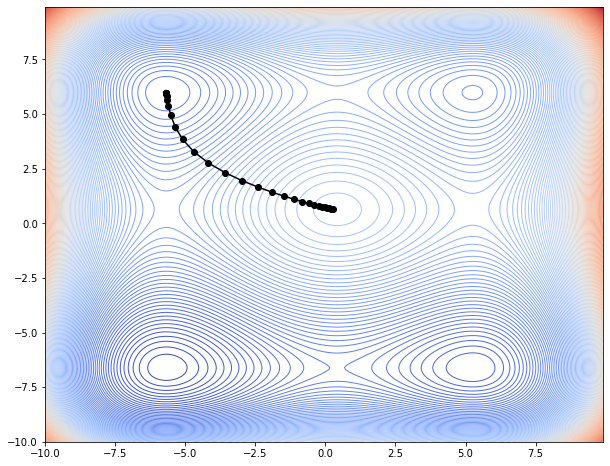

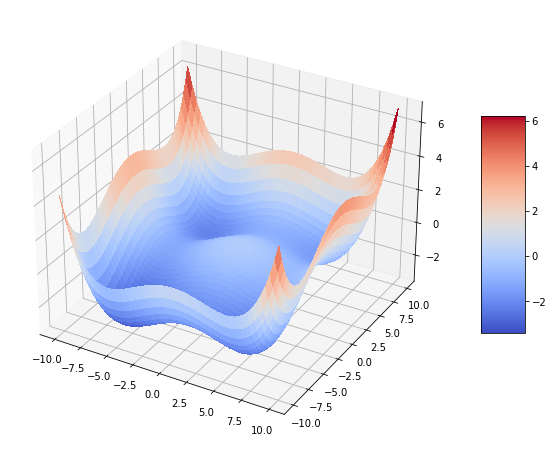

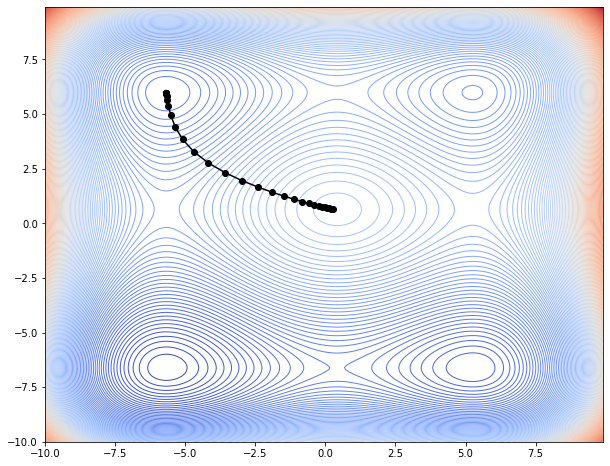

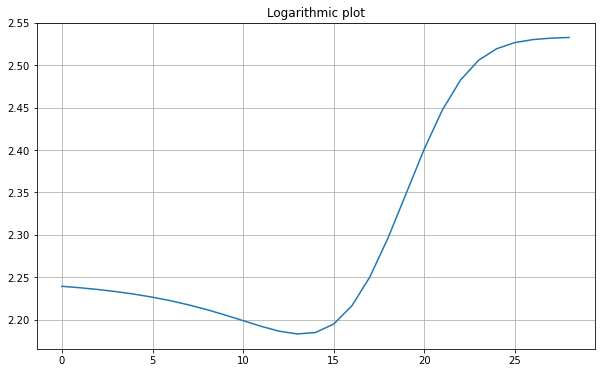

In [64]:
toy_main()

## **2. Image denoising energy**

### **1. Complete the functions _im_fwd_gradient_ and _im_bwd_divergence_. These functions compute the forward gradient &nabla;<sup>+</sup> and the backwards divergence div<sup>-</sup>. Follow the comments provided in the code. Avoid building the matrices &nabla;<sup>+</sup> and div<sup>-</sup>**

#### **1.1 im_fwd_gradient**

For matrix $u$, $\nabla^{+}u_{i,j} = (\nabla^{+}_{i}u_{i,j},\nabla^{+}_{j}u_{i,j})$ where:

$$\nabla^{+}_{i}u_{i,j} = \begin{cases}
  u_{i+1,j} - u_{i,j} & \text{if }i<M\\ 
  0& \text{if }i=M
\end{cases}$$

$$\nabla^{+}_{j}u_{i,j} = \begin{cases}
  u_{i,j+1} - u_{i,j} & \text{if }j<N\\ 
  0& \text{if }j=N
\end{cases}
$$


In [9]:
def im_fwd_gradient(image: np.matrix):
    """
    Discrete gradient of an image using forward differences, with homogeneous Neuman boundary conditions.

    :param u: image (MxN)
            
    :return gradu_j: partial derivative in the j (rows) direction (also x direction)
    :return gradu_i: partial derivative in the i (cols) direction (also y direction)
    """
    # TODO: Get the size of the image
    image_shape = image.shape
    
    # TODO: Calculate both gradients
        
    gradu_j = np.zeros((image_shape))
    gradu_i = np.zeros((image_shape))
    
    for i in range(image_shape[0]):
        for j in range(image_shape[1]):
            if(i == image_shape[0]-1):
                gradu_i[i,j] = 0 
            else:
                gradu_i[i,j] = image[i+1,j] - image[i,j]
            if(j == image_shape[1]-1):
                gradu_j[i,j] = 0
            else:
                gradu_j[i,j] = image[i,j+1] - image[i,j]
                
    return gradu_i, gradu_j

In [10]:
# TODO: gradient verification on a simple image
image = np.matrix([[0.75,0.8,2.3],[6,5,8],[7,9,0]])
gradient_i, gradient_j = im_fwd_gradient(image)
print(gradient_i)
print(gradient_j)

[[ 5.25  4.2   5.7 ]
 [ 1.    4.   -8.  ]
 [ 0.    0.    0.  ]]
[[ 0.05  1.5   0.  ]
 [-1.    3.    0.  ]
 [ 2.   -9.    0.  ]]


#### **1.2 im_bwd_divergence**

For matrix $u$, with $u^{1} = \nabla^{+}_{i}u_{i,j}$ and $u^{2} = \nabla^{+}_{j}u_{i,j}$:

$$(div^{-}\,u) = 
\begin{cases}
  u^{1}_{i,j} - u^{1}_{i-1,j} & \text{if }1< i<M\\ 
  u^{1}_{i,j} & \text{if }i=1\\
  - u^{1}_{i-1,j} & \text{if }i=M
\end{cases}
+
\begin{cases}
  u^{2}_{i,j} - u^{2}_{i,j-1} & \text{if }1< j<N\\ 
  u^{2}_{i,j} & \text{if }j=1\\
  - u^{2}_{i,j-1} & \text{if }j=N
\end{cases}
$$

In [22]:
def im_bwd_divergence(gradient_i: np.matrix,
                      gradient_j: np.matrix):
    """
    Discrete divergence of a vector field using backwards differences. 
    This is the negative transpose of the im_fwd_gradient
    
    :param gradient_i: component of g in the direction j (rows) (also x direction)
    :param gradient_j: component of g in the direction i (cols) (also y direction)
    
    :return divg: backwards divergence of g
    """
    divg = np.zeros((gradient_i.shape))
    div_i = np.zeros((gradient_i.shape))
    div_j = np.zeros((gradient_j.shape))
    
    # TODO: Backwards j partial derivative of gradient_j
    for i in range(gradient_j.shape[0]):
        for j in range(gradient_j.shape[1]):
            if(j == 0):
                div_j[i,j] = gradient_j[i,j] 
            elif(j == gradient_j.shape[1]-1):
                div_j[i,j] = gradient_j[i,j-1] * (-1)
            else:
                div_j[i,j] = gradient_j[i,j]-gradient_j[i,j-1]
    # TODO: Backwards i partial derivative of gradient_i
    for i in range(gradient_i.shape[0]):
        for j in range(gradient_i.shape[1]):
            if(i == 0):
                div_i[i,j] = gradient_i[i,j] 
            elif(i == gradient_i.shape[0]-1):
                div_i[i,j] = gradient_i[i-1,j] * (-1)
            else:
                div_i[i,j] = gradient_i[i,j]-gradient_i[i-1,j]
    divg = div_i+div_j
    return divg

In [23]:
# TODO: divergence verification on an image
image = np.matrix([[0.75,0.8,2.3],[6,5,8],[7,9,0]])
im_bwd_divergence(gradient_i, gradient_j)

array([[  5.3 ,   5.65,   4.2 ],
       [ -5.25,   3.8 , -16.7 ],
       [  1.  , -15.  ,  17.  ]])

### **2. Complete the functions denoise_energy and denoise_energy_gradient following the comments provided in the code. Avoid building sparse huge matrices.**

Let:

+ $u \rightarrow$ Decision variable (final image)
+ $f \rightarrow$ Noisy Image

Then,

\begin{equation}
	E(u) = \overbrace{\sum_{i = 1}^M\sum_{j = 1}^N c_{ij}|\nabla^+u_{ij}|^2}^{\text{regularization}}  +	\beta \overbrace{\sum_{i = 1}^M\sum_{j = 1}^N (u_{ij} -	f_{ij})^2,}^{\text{data attachment}}
\end{equation}

In [24]:
def denoise_energy(image: np.matrix,
                   noise: np.matrix,
                   coefficients: np.matrix,
                   beta: float):
    """
    Evaluates the denoising energy from an image and the noisy
    data (see the guide)

    :param  image: target image (MxN)
    :param  noise: (MxN) noisy data for attachment term 
    :param  coefficients: (MxN) coefficients image for regularization term
    :param  beta: (1x1) weight of attachment term

    :return e: energy value
    """
    energy = 0.0
    regularization = 0.0
    data_attachment = 0.0
    M = image.shape[0]
    N = image.shape[1]
    
    # TODO: Calculate the regularization term
    gradient_i, gradient_j = im_fwd_gradient(image)
    norm = np.power(gradient_i,2) + np.power(gradient_j,2)
    regularization=np.sum(coefficients*norm)
            
    # TODO: Calculate the data attachment term
    data_attachment = np.sum(beta*np.power(image-noise,2))
    energy = regularization+data_attachment
    return energy

In [25]:
# TODO: denoise energy verification on an easy image
image_real = np.array([[1,2,3], [5,6,7], [8,9,10]])
noise = 5*np.ones_like(image_real)
image_noisy = image_real + noise
coefficients = np.ones_like(image_real)
beta = .05
denoise_energy(image_real, image_noisy, coefficients, beta)


92.25

Also,

\begin{equation}
	\nabla E(u) = -2div^{-}(C\nabla^+u_{ij}) + 2\beta(u - f)
\end{equation}

In [26]:
def denoise_energy_gradient(image: np.matrix,
                            noise: np.matrix,
                            coefficients: np.matrix,
                            beta: float):
    """
    Evaluates the denoising energy gradient from an image and the noisy data (see the guide)

    :param image: target image (MxN)
    :param noise: (MxN) noisy data for attachment term 
    :param coefficients: (MxN) coefficients image for regularization term
    :param beta: (1x1) weight of attachment term

    :return grade : (MxN) gradient of energy at u
    """
    grade = 0.0
    regularization = 0.0
    data_attachment = 0.0
    
    # TODO: Calculate the gradient of regularization term
    regularization = -2 * im_bwd_divergence(coefficients[0]*im_fwd_gradient(image)[0], coefficients[1]*im_fwd_gradient(image)[1])
    
    # TODO: Calculate the gradient of data attachment term
    data_attachment = 2*beta*(image-noise)
    
    # TODO: Calculate the gradient
    grade = regularization+data_attachment
    
    return grade

In [27]:
# TODO: denoise energy gradient verification on an easy image
image_real = np.array([[1,2,3], [5,6,7], [8,9,10]])
noise = 5*np.ones_like(image_real)
image_noisy = image_real + noise
coefficients = np.ones_like(image_real)
beta = .05
denoise_energy_gradient(image_real, image_noisy, coefficients, beta)

array([[-10.5,  -8.5,  -6.5],
       [ -0.5,   1.5,   3.5],
       [  3.5,   5.5,   7.5]])

### **3. Run the blocks with different denoising parameters (&beta; and c). In the report, show results with different values of &beta; and different images c (you can use the examples provided in the notebook). Describe the effect of these parameters in the result.**

**Load the image**

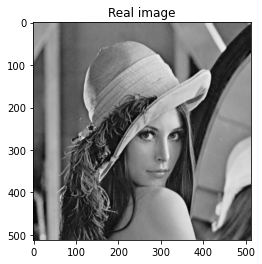

In [28]:
images_dir = os.path.abspath("../images")
image_real = np.array(Image.open(os.path.join(images_dir, "lena.pgm")))
plt.figure()
plt.title("Real image")
plt.imshow(image_real, cmap = "gray")

**Add noise to the image**

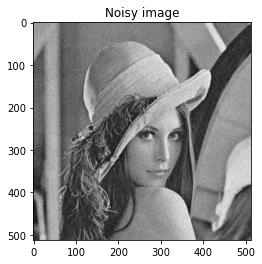

In [29]:
image_noisy = image_real + np.random.uniform(high = 50, size = image_real.shape)
plt.figure()
plt.title("Noisy image")
plt.imshow(image_noisy, cmap = "gray")

**Run the Gradient Descent**

In [75]:
# Define the gradient descent parameters
callback_params = {
    "noise": image_noisy,
    "coefficients": np.ones_like(image_noisy),    # --> CHANGE THIS AND COMPARE
    "beta": .9                                   # --> CHANGE THIS AND COMPARE
}
step_size = .001                                # --> CHANGE THIS AND COMPARE
max_iterations = 10000                              # --> CHANGE THIS AND COMPARE
tolerance = .001                                    # --> CHANGE THIS AND COMPARE

# Run the gradient descent
image_gd = gradient_descent(callback = denoise_energy_gradient,
                            callback_params = callback_params, 
                            initial_condition = image_noisy, 
                            step_size = step_size, 
                            max_iterations = max_iterations,
                            tolerance = tolerance,
                            logplot = False)

0 of 10000 -> tolerance: 69047.47120778215
1 of 10000 -> tolerance: 68173.02105056966
2 of 10000 -> tolerance: 67311.21292394004
3 of 10000 -> tolerance: 66461.851807506
4 of 10000 -> tolerance: 65624.74579635427
5 of 10000 -> tolerance: 64799.706050303656
6 of 10000 -> tolerance: 63986.54674400043
7 of 10000 -> tolerance: 63185.08501783582
8 of 10000 -> tolerance: 62395.1409296733
9 of 10000 -> tolerance: 61616.537407370735
10 of 10000 -> tolerance: 60849.10020208532
11 of 10000 -> tolerance: 60092.65784234778
12 of 10000 -> tolerance: 59347.04158889283
13 of 10000 -> tolerance: 58612.08539023373
14 of 10000 -> tolerance: 57887.62583896827
15 of 10000 -> tolerance: 57173.502128803964
16 of 10000 -> tolerance: 56469.556012290726
17 of 10000 -> tolerance: 55775.63175924927
18 of 10000 -> tolerance: 55091.57611588307
19 of 10000 -> tolerance: 54417.238264563246
20 of 10000 -> tolerance: 53752.469784274945
21 of 10000 -> tolerance: 53097.124611714025
22 of 10000 -> tolerance: 52451.059003

183 of 10000 -> tolerance: 10264.576485422418
184 of 10000 -> tolerance: 10182.31999089282
185 of 10000 -> tolerance: 10100.963197161662
186 of 10000 -> tolerance: 10020.494453084068
187 of 10000 -> tolerance: 9940.90227379697
188 of 10000 -> tolerance: 9862.175338183682
189 of 10000 -> tolerance: 9784.302486379045
190 of 10000 -> tolerance: 9707.272717314292
191 of 10000 -> tolerance: 9631.075186301108
192 of 10000 -> tolerance: 9555.699202654176
193 of 10000 -> tolerance: 9481.13422735162
194 of 10000 -> tolerance: 9407.369870732731
195 of 10000 -> tolerance: 9334.395890232288
196 of 10000 -> tolerance: 9262.202188151005
197 of 10000 -> tolerance: 9190.778809461406
198 of 10000 -> tolerance: 9120.115939648631
199 of 10000 -> tolerance: 9050.2039025855
200 of 10000 -> tolerance: 8981.033158441409
201 of 10000 -> tolerance: 8912.594301624371
202 of 10000 -> tolerance: 8844.878058755801
203 of 10000 -> tolerance: 8777.875286677365
204 of 10000 -> tolerance: 8711.576970489457
205 of 1000

365 of 10000 -> tolerance: 3276.930274314485
366 of 10000 -> tolerance: 3260.9602797273083
367 of 10000 -> tolerance: 3245.103769871096
368 of 10000 -> tolerance: 3229.359655687949
369 of 10000 -> tolerance: 3213.726860718173
370 of 10000 -> tolerance: 3198.204320937858
371 of 10000 -> tolerance: 3182.7909845986933
372 of 10000 -> tolerance: 3167.485812070015
373 of 10000 -> tolerance: 3152.2877756830167
374 of 10000 -> tolerance: 3137.1958595771152
375 of 10000 -> tolerance: 3122.2090595484274
376 of 10000 -> tolerance: 3107.326382900343
377 of 10000 -> tolerance: 3092.5468482961483
378 of 10000 -> tolerance: 3077.869485613669
379 of 10000 -> tolerance: 3063.293335801919
380 of 10000 -> tolerance: 3048.8174507397075
381 of 10000 -> tolerance: 3034.4408930961995
382 of 10000 -> tolerance: 3020.1627361933643
383 of 10000 -> tolerance: 3005.9820638703254
384 of 10000 -> tolerance: 2991.897970349561
385 of 10000 -> tolerance: 2977.9095601049235
386 of 10000 -> tolerance: 2964.015947731478

545 of 10000 -> tolerance: 1551.6729850818078
546 of 10000 -> tolerance: 1546.0772515388958
547 of 10000 -> tolerance: 1540.5083061636328
548 of 10000 -> tolerance: 1534.9659738050232
549 of 10000 -> tolerance: 1529.4500808158705
550 of 10000 -> tolerance: 1523.960455037043
551 of 10000 -> tolerance: 1518.496925781926
552 of 10000 -> tolerance: 1513.0593238210558
553 of 10000 -> tolerance: 1507.6474813669392
554 of 10000 -> tolerance: 1502.2612320590497
555 of 10000 -> tolerance: 1496.9004109490054
556 of 10000 -> tolerance: 1491.5648544859214
557 of 10000 -> tolerance: 1486.254400501933
558 of 10000 -> tolerance: 1480.968888197897
559 of 10000 -> tolerance: 1475.7081581292475
560 of 10000 -> tolerance: 1470.4720521920392
561 of 10000 -> tolerance: 1465.2604136091404
562 of 10000 -> tolerance: 1460.0730869165832
563 of 10000 -> tolerance: 1454.9099179500984
564 of 10000 -> tolerance: 1449.7707538317818
565 of 10000 -> tolerance: 1444.6554429569326
566 of 10000 -> tolerance: 1439.563834

725 of 10000 -> tolerance: 854.8831528248468
726 of 10000 -> tolerance: 852.2604118138229
727 of 10000 -> tolerance: 849.6474892501006
728 of 10000 -> tolerance: 847.0443382285389
729 of 10000 -> tolerance: 844.450912133686
730 of 10000 -> tolerance: 841.8671646375223
731 of 10000 -> tolerance: 839.2930496972197
732 of 10000 -> tolerance: 836.7285215529193
733 of 10000 -> tolerance: 834.1735347255357
734 of 10000 -> tolerance: 831.6280440145782
735 of 10000 -> tolerance: 829.0920044959919
736 of 10000 -> tolerance: 826.5653715200233
737 of 10000 -> tolerance: 824.0481007091015
738 of 10000 -> tolerance: 821.5401479557415
739 of 10000 -> tolerance: 819.0414694204643
740 of 10000 -> tolerance: 816.5520215297438
741 of 10000 -> tolerance: 814.0717609739612
742 of 10000 -> tolerance: 811.6006447053909
743 of 10000 -> tolerance: 809.1386299361935
744 of 10000 -> tolerance: 806.6856741364381
745 of 10000 -> tolerance: 804.2417350321327
746 of 10000 -> tolerance: 801.8067706032841
747 of 1000

908 of 10000 -> tolerance: 501.54118345653507
909 of 10000 -> tolerance: 500.14896119679946
910 of 10000 -> tolerance: 498.7612158430493
911 of 10000 -> tolerance: 497.3779300368629
912 of 10000 -> tolerance: 495.9990865030037
913 of 10000 -> tolerance: 494.62466804892694
914 of 10000 -> tolerance: 493.2546575642914
915 of 10000 -> tolerance: 491.8890380204713
916 of 10000 -> tolerance: 490.52779247007464
917 of 10000 -> tolerance: 489.17090404646206
918 of 10000 -> tolerance: 487.81835596327187
919 of 10000 -> tolerance: 486.4701315139485
920 of 10000 -> tolerance: 485.12621407127114
921 of 10000 -> tolerance: 483.78658708688835
922 of 10000 -> tolerance: 482.45123409085704
923 of 10000 -> tolerance: 481.1201386911829
924 of 10000 -> tolerance: 479.79328457336163
925 of 10000 -> tolerance: 478.47065549993
926 of 10000 -> tolerance: 477.1522353100142
927 of 10000 -> tolerance: 475.8380079188843
928 of 10000 -> tolerance: 474.5279573175111
929 of 10000 -> tolerance: 473.22206757212535
9

1087 of 10000 -> tolerance: 310.18875699248576
1088 of 10000 -> tolerance: 309.38327270801045
1089 of 10000 -> tolerance: 308.5801326725145
1090 of 10000 -> tolerance: 307.77932897222
1091 of 10000 -> tolerance: 306.98085372519546
1092 of 10000 -> tolerance: 306.1846990812014
1093 of 10000 -> tolerance: 305.3908572215375
1094 of 10000 -> tolerance: 304.5993203588891
1095 of 10000 -> tolerance: 303.8100807371759
1096 of 10000 -> tolerance: 303.02313063140133
1097 of 10000 -> tolerance: 302.2384623475019
1098 of 10000 -> tolerance: 301.45606822219804
1099 of 10000 -> tolerance: 300.6759406228468
1100 of 10000 -> tolerance: 299.8980719472929
1101 of 10000 -> tolerance: 299.1224546237234
1102 of 10000 -> tolerance: 298.3490811105213
1103 of 10000 -> tolerance: 297.57794389612087
1104 of 10000 -> tolerance: 296.80903549886335
1105 of 10000 -> tolerance: 296.04234846685443
1106 of 10000 -> tolerance: 295.2778753778203
1107 of 10000 -> tolerance: 294.515608838968
1108 of 10000 -> tolerance: 2

1264 of 10000 -> tolerance: 198.01924147011826
1265 of 10000 -> tolerance: 197.5292810824146
1266 of 10000 -> tolerance: 197.0406485426711
1267 of 10000 -> tolerance: 196.5533397935071
1268 of 10000 -> tolerance: 196.06735079190443
1269 of 10000 -> tolerance: 195.5826775091475
1270 of 10000 -> tolerance: 195.09931593076348
1271 of 10000 -> tolerance: 194.61726205646332
1272 of 10000 -> tolerance: 194.13651190008272
1273 of 10000 -> tolerance: 193.65706148952316
1274 of 10000 -> tolerance: 193.17890686669392
1275 of 10000 -> tolerance: 192.70204408745326
1276 of 10000 -> tolerance: 192.2264692215509
1277 of 10000 -> tolerance: 191.7521783525713
1278 of 10000 -> tolerance: 191.2791675778746
1279 of 10000 -> tolerance: 190.80743300854107
1280 of 10000 -> tolerance: 190.33697076931372
1281 of 10000 -> tolerance: 189.86777699854235
1282 of 10000 -> tolerance: 189.39984784812657
1283 of 10000 -> tolerance: 188.93317948346058
1284 of 10000 -> tolerance: 188.4677680833773
1285 of 10000 -> tole

1440 of 10000 -> tolerance: 129.0960646974388
1441 of 10000 -> tolerance: 128.78817331124094
1442 of 10000 -> tolerance: 128.48107285647973
1443 of 10000 -> tolerance: 128.17476109132272
1444 of 10000 -> tolerance: 127.86923578112743
1445 of 10000 -> tolerance: 127.56449469841495
1446 of 10000 -> tolerance: 127.26053562284336
1447 of 10000 -> tolerance: 126.95735634118142
1448 of 10000 -> tolerance: 126.65495464728224
1449 of 10000 -> tolerance: 126.35332834205704
1450 of 10000 -> tolerance: 126.05247523344929
1451 of 10000 -> tolerance: 125.75239313640881
1452 of 10000 -> tolerance: 125.45307987286552
1453 of 10000 -> tolerance: 125.15453327170408
1454 of 10000 -> tolerance: 124.85675116873865
1455 of 10000 -> tolerance: 124.5597314066865
1456 of 10000 -> tolerance: 124.26347183514346
1457 of 10000 -> tolerance: 123.96797031055802
1458 of 10000 -> tolerance: 123.67322469620669
1459 of 10000 -> tolerance: 123.37923286216846
1460 of 10000 -> tolerance: 123.08599268530048
1461 of 10000 -

1617 of 10000 -> tolerance: 85.13370248784197
1618 of 10000 -> tolerance: 84.9365053493967
1619 of 10000 -> tolerance: 84.7397940093281
1620 of 10000 -> tolerance: 84.54356716922844
1621 of 10000 -> tolerance: 84.34782353454041
1622 of 10000 -> tolerance: 84.1525618145442
1623 of 10000 -> tolerance: 83.9577807223445
1624 of 10000 -> tolerance: 83.76347897485782
1625 of 10000 -> tolerance: 83.56965529279972
1626 of 10000 -> tolerance: 83.37630840067192
1627 of 10000 -> tolerance: 83.18343702674966
1628 of 10000 -> tolerance: 82.99103990306931
1629 of 10000 -> tolerance: 82.79911576541537
1630 of 10000 -> tolerance: 82.60766335330824
1631 of 10000 -> tolerance: 82.4166814099917
1632 of 10000 -> tolerance: 82.22616868242022
1633 of 10000 -> tolerance: 82.03612392124688
1634 of 10000 -> tolerance: 81.84654588081094
1635 of 10000 -> tolerance: 81.6574333191252
1636 of 10000 -> tolerance: 81.4687849978644
1637 of 10000 -> tolerance: 81.28059968235243
1638 of 10000 -> tolerance: 81.0928761415

1796 of 10000 -> tolerance: 56.49666525126302
1797 of 10000 -> tolerance: 56.36888928002768
1798 of 10000 -> tolerance: 56.24141766046853
1799 of 10000 -> tolerance: 56.11424961647617
1800 of 10000 -> tolerance: 55.987384374101616
1801 of 10000 -> tolerance: 55.86082116154966
1802 of 10000 -> tolerance: 55.734559209171756
1803 of 10000 -> tolerance: 55.608597749459925
1804 of 10000 -> tolerance: 55.48293601703972
1805 of 10000 -> tolerance: 55.357573248663954
1806 of 10000 -> tolerance: 55.23250868320588
1807 of 10000 -> tolerance: 55.107741561652695
1808 of 10000 -> tolerance: 54.983271127099
1809 of 10000 -> tolerance: 54.859096624740445
1810 of 10000 -> tolerance: 54.73521730186701
1811 of 10000 -> tolerance: 54.61163240785669
1812 of 10000 -> tolerance: 54.48834119416896
1813 of 10000 -> tolerance: 54.36534291433846
1814 of 10000 -> tolerance: 54.242636823968496
1815 of 10000 -> tolerance: 54.12022218072473
1816 of 10000 -> tolerance: 53.998098244328844
1817 of 10000 -> tolerance: 

1973 of 10000 -> tolerance: 37.99279496747646
1974 of 10000 -> tolerance: 37.90852761635638
1975 of 10000 -> tolerance: 37.82445562599268
1976 of 10000 -> tolerance: 37.74057851649729
1977 of 10000 -> tolerance: 37.656895809252056
1978 of 10000 -> tolerance: 37.57340702690502
1979 of 10000 -> tolerance: 37.49011169336683
1980 of 10000 -> tolerance: 37.40700933380704
1981 of 10000 -> tolerance: 37.32409947465036
1982 of 10000 -> tolerance: 37.24138164357311
1983 of 10000 -> tolerance: 37.15885536949974
1984 of 10000 -> tolerance: 37.07652018259888
1985 of 10000 -> tolerance: 36.99437561428002
1986 of 10000 -> tolerance: 36.912421197189786
1987 of 10000 -> tolerance: 36.83065646520837
1988 of 10000 -> tolerance: 36.74908095344599
1989 of 10000 -> tolerance: 36.66769419823941
1990 of 10000 -> tolerance: 36.58649573714813
1991 of 10000 -> tolerance: 36.505485108951206
1992 of 10000 -> tolerance: 36.424661853643464
1993 of 10000 -> tolerance: 36.34402551243201
1994 of 10000 -> tolerance: 36

2150 of 10000 -> tolerance: 25.729967125724077
2151 of 10000 -> tolerance: 25.673826803659615
2152 of 10000 -> tolerance: 25.617813751308546
2153 of 10000 -> tolerance: 25.561927665476095
2154 of 10000 -> tolerance: 25.50616824373736
2155 of 10000 -> tolerance: 25.450535184435083
2156 of 10000 -> tolerance: 25.395028186677674
2157 of 10000 -> tolerance: 25.33964695033692
2158 of 10000 -> tolerance: 25.284391176046128
2159 of 10000 -> tolerance: 25.229260565197904
2160 of 10000 -> tolerance: 25.174254819942025
2161 of 10000 -> tolerance: 25.11937364318346
2162 of 10000 -> tolerance: 25.06461673858023
2163 of 10000 -> tolerance: 25.009983810541325
2164 of 10000 -> tolerance: 24.955474564224765
2165 of 10000 -> tolerance: 24.90108870553538
2166 of 10000 -> tolerance: 24.84682594112291
2167 of 10000 -> tolerance: 24.792685978379808
2168 of 10000 -> tolerance: 24.73866852543938
2169 of 10000 -> tolerance: 24.684773291173602
2170 of 10000 -> tolerance: 24.63099998519121
2171 of 10000 -> tole

2326 of 10000 -> tolerance: 17.565560498525468
2327 of 10000 -> tolerance: 17.52776403762769
2328 of 10000 -> tolerance: 17.490051670143625
2329 of 10000 -> tolerance: 17.45242320075014
2330 of 10000 -> tolerance: 17.414878434603377
2331 of 10000 -> tolerance: 17.377417177337612
2332 of 10000 -> tolerance: 17.34003923506385
2333 of 10000 -> tolerance: 17.302744414368824
2334 of 10000 -> tolerance: 17.265532522313446
2335 of 10000 -> tolerance: 17.228403366431785
2336 of 10000 -> tolerance: 17.191356754729753
2337 of 10000 -> tolerance: 17.15439249568378
2338 of 10000 -> tolerance: 17.117510398239734
2339 of 10000 -> tolerance: 17.080710271811505
2340 of 10000 -> tolerance: 17.04399192628
2341 of 10000 -> tolerance: 17.007355171991744
2342 of 10000 -> tolerance: 16.970799819757712
2343 of 10000 -> tolerance: 16.934325680852094
2344 of 10000 -> tolerance: 16.897932567011186
2345 of 10000 -> tolerance: 16.861620290431922
2346 of 10000 -> tolerance: 16.825388663770998
2347 of 10000 -> tole

2502 of 10000 -> tolerance: 12.050928323676274
2503 of 10000 -> tolerance: 12.02530817190373
2504 of 10000 -> tolerance: 11.999744118129646
2505 of 10000 -> tolerance: 11.974236034810984
2506 of 10000 -> tolerance: 11.94878379470889
2507 of 10000 -> tolerance: 11.923387270887936
2508 of 10000 -> tolerance: 11.898046336715387
2509 of 10000 -> tolerance: 11.872760865860366
2510 of 10000 -> tolerance: 11.847530732293158
2511 of 10000 -> tolerance: 11.8223558102845
2512 of 10000 -> tolerance: 11.797235974404654
2513 of 10000 -> tolerance: 11.772171099522758
2514 of 10000 -> tolerance: 11.747161060806034
2515 of 10000 -> tolerance: 11.722205733719097
2516 of 10000 -> tolerance: 11.697304994023114
2517 of 10000 -> tolerance: 11.672458717775182
2518 of 10000 -> tolerance: 11.64766678132735
2519 of 10000 -> tolerance: 11.622929061326177
2520 of 10000 -> tolerance: 11.598245434711707
2521 of 10000 -> tolerance: 11.573615778716942
2522 of 10000 -> tolerance: 11.549039970866934
2523 of 10000 -> t

2679 of 10000 -> tolerance: 8.285104743805922
2680 of 10000 -> tolerance: 8.267675919355312
2681 of 10000 -> tolerance: 8.250284731188728
2682 of 10000 -> tolerance: 8.232931095292546
2683 of 10000 -> tolerance: 8.21561492784866
2684 of 10000 -> tolerance: 8.198336145234109
2685 of 10000 -> tolerance: 8.181094664020538
2686 of 10000 -> tolerance: 8.163890400973694
2687 of 10000 -> tolerance: 8.146723273053098
2688 of 10000 -> tolerance: 8.129593197411406
2689 of 10000 -> tolerance: 8.112500091393935
2690 of 10000 -> tolerance: 8.095443872538338
2691 of 10000 -> tolerance: 8.07842445857402
2692 of 10000 -> tolerance: 8.061441767421648
2693 of 10000 -> tolerance: 8.044495717192854
2694 of 10000 -> tolerance: 8.027586226189479
2695 of 10000 -> tolerance: 8.010713212903378
2696 of 10000 -> tolerance: 7.99387659601582
2697 of 10000 -> tolerance: 7.977076294397002
2698 of 10000 -> tolerance: 7.96031222710568
2699 of 10000 -> tolerance: 7.943584313388639
2700 of 10000 -> tolerance: 7.92689247

2858 of 10000 -> tolerance: 5.693405144631934
2859 of 10000 -> tolerance: 5.68154045736722
2860 of 10000 -> tolerance: 5.669701079884701
2861 of 10000 -> tolerance: 5.657886956582423
2862 of 10000 -> tolerance: 5.646098031985173
2863 of 10000 -> tolerance: 5.634334250744153
2864 of 10000 -> tolerance: 5.622595557636751
2865 of 10000 -> tolerance: 5.610881897566187
2866 of 10000 -> tolerance: 5.599193215561246
2867 of 10000 -> tolerance: 5.58752945677596
2868 of 10000 -> tolerance: 5.575890566489326
2869 of 10000 -> tolerance: 5.564276490104903
2870 of 10000 -> tolerance: 5.552687173150739
2871 of 10000 -> tolerance: 5.5411225612788515
2872 of 10000 -> tolerance: 5.5295826002650825
2873 of 10000 -> tolerance: 5.518067236008705
2874 of 10000 -> tolerance: 5.506576414532135
2875 of 10000 -> tolerance: 5.495110081980703
2876 of 10000 -> tolerance: 5.483668184622374
2877 of 10000 -> tolerance: 5.472250668847292
2878 of 10000 -> tolerance: 5.460857481167735
2879 of 10000 -> tolerance: 5.4494

3036 of 10000 -> tolerance: 3.933538092821871
3037 of 10000 -> tolerance: 3.925408553835268
3038 of 10000 -> tolerance: 3.917296172792708
3039 of 10000 -> tolerance: 3.909200912518013
3040 of 10000 -> tolerance: 3.9011227359182117
3041 of 10000 -> tolerance: 3.8930616059834153
3042 of 10000 -> tolerance: 3.885017485786601
3043 of 10000 -> tolerance: 3.8769903384833766
3044 of 10000 -> tolerance: 3.8689801273118483
3045 of 10000 -> tolerance: 3.8609868155923817
3046 of 10000 -> tolerance: 3.8530103667273963
3047 of 10000 -> tolerance: 3.8450507442012576
3048 of 10000 -> tolerance: 3.837107911579992
3049 of 10000 -> tolerance: 3.829181832511145
3050 of 10000 -> tolerance: 3.8212724707236307
3051 of 10000 -> tolerance: 3.8133797900274327
3052 of 10000 -> tolerance: 3.8055037543134507
3053 of 10000 -> tolerance: 3.7976443275534293
3054 of 10000 -> tolerance: 3.7898014737996144
3055 of 10000 -> tolerance: 3.781975157184672
3056 of 10000 -> tolerance: 3.7741653419213796
3057 of 10000 -> tole

3213 of 10000 -> tolerance: 2.731125582795212
3214 of 10000 -> tolerance: 2.725522507622056
3215 of 10000 -> tolerance: 2.71993114759618
3216 of 10000 -> tolerance: 2.7143514776386493
3217 of 10000 -> tolerance: 2.7087834727257873
3218 of 10000 -> tolerance: 2.703227107889119
3219 of 10000 -> tolerance: 2.6976823582152165
3220 of 10000 -> tolerance: 2.6921491988455224
3221 of 10000 -> tolerance: 2.686627604976274
3222 of 10000 -> tolerance: 2.68111755185838
3223 of 10000 -> tolerance: 2.6756190147972627
3224 of 10000 -> tolerance: 2.6701319691527736
3225 of 10000 -> tolerance: 2.6646563903390503
3226 of 10000 -> tolerance: 2.659192253824345
3227 of 10000 -> tolerance: 2.653739535131023
3228 of 10000 -> tolerance: 2.6482982098352985
3229 of 10000 -> tolerance: 2.642868253567218
3230 of 10000 -> tolerance: 2.63744964201045
3231 of 10000 -> tolerance: 2.6320423509022266
3232 of 10000 -> tolerance: 2.626646356033235
3233 of 10000 -> tolerance: 2.621261633247447
3234 of 10000 -> tolerance: 

3390 of 10000 -> tolerance: 1.9010931610819843
3391 of 10000 -> tolerance: 1.8972186605960137
3392 of 10000 -> tolerance: 1.893352193563275
3393 of 10000 -> tolerance: 1.8894937429688223
3394 of 10000 -> tolerance: 1.885643291834668
3395 of 10000 -> tolerance: 1.8818008232197942
3396 of 10000 -> tolerance: 1.8779663202199468
3397 of 10000 -> tolerance: 1.8741397659676866
3398 of 10000 -> tolerance: 1.8703211436322131
3399 of 10000 -> tolerance: 1.8665104364193172
3400 of 10000 -> tolerance: 1.8627076275713264
3401 of 10000 -> tolerance: 1.8589127003669172
3402 of 10000 -> tolerance: 1.8551256381211885
3403 of 10000 -> tolerance: 1.8513464241854802
3404 of 10000 -> tolerance: 1.8475750419472736
3405 of 10000 -> tolerance: 1.843811474830169
3406 of 10000 -> tolerance: 1.8400557062938128
3407 of 10000 -> tolerance: 1.8363077198337512
3408 of 10000 -> tolerance: 1.8325674989813745
3409 of 10000 -> tolerance: 1.8288350273039082
3410 of 10000 -> tolerance: 1.8251102884041903
3411 of 10000 ->

3566 of 10000 -> tolerance: 1.3290243497504974
3567 of 10000 -> tolerance: 1.326331785908994
3568 of 10000 -> tolerance: 1.3236447633713617
3569 of 10000 -> tolerance: 1.3209632705112728
3570 of 10000 -> tolerance: 1.318287295727409
3571 of 10000 -> tolerance: 1.3156168274434688
3572 of 10000 -> tolerance: 1.312951854107957
3573 of 10000 -> tolerance: 1.3102923641942015
3574 of 10000 -> tolerance: 1.3076383462003125
3575 of 10000 -> tolerance: 1.304989788649074
3576 of 10000 -> tolerance: 1.3023466800879377
3577 of 10000 -> tolerance: 1.299709009088938
3578 of 10000 -> tolerance: 1.2970767642487133
3579 of 10000 -> tolerance: 1.2944499341883051
3580 of 10000 -> tolerance: 1.291828507553226
3581 of 10000 -> tolerance: 1.2892124730133834
3582 of 10000 -> tolerance: 1.2866018192629978
3583 of 10000 -> tolerance: 1.283996535020557
3584 of 10000 -> tolerance: 1.2813966090287374
3585 of 10000 -> tolerance: 1.278802030054475
3586 of 10000 -> tolerance: 1.2762127868887125
3587 of 10000 -> tole

3742 of 10000 -> tolerance: 0.9309807407183417
3743 of 10000 -> tolerance: 0.9291047373773968
3744 of 10000 -> tolerance: 0.9272325689768266
3745 of 10000 -> tolerance: 0.9253642275382566
3746 of 10000 -> tolerance: 0.9234997051002852
3747 of 10000 -> tolerance: 0.9216389937183999
3748 of 10000 -> tolerance: 0.9197820854649665
3749 of 10000 -> tolerance: 0.9179289724292456
3750 of 10000 -> tolerance: 0.9160796467173421
3751 of 10000 -> tolerance: 0.914234100452065
3752 of 10000 -> tolerance: 0.912392325773017
3753 of 10000 -> tolerance: 0.9105543148364242
3754 of 10000 -> tolerance: 0.9087200598152941
3755 of 10000 -> tolerance: 0.9068895528991531
3756 of 10000 -> tolerance: 0.9050627862941703
3757 of 10000 -> tolerance: 0.9032397522231408
3758 of 10000 -> tolerance: 0.9014204429252469
3759 of 10000 -> tolerance: 0.8996048506562706
3760 of 10000 -> tolerance: 0.8977929676883618
3761 of 10000 -> tolerance: 0.8959847863101664
3762 of 10000 -> tolerance: 0.8941802988266601
3763 of 10000 -

3917 of 10000 -> tolerance: 0.6546577148521815
3918 of 10000 -> tolerance: 0.6533449497192101
3919 of 10000 -> tolerance: 0.6520348519478645
3920 of 10000 -> tolerance: 0.6507274160306512
3921 of 10000 -> tolerance: 0.6494226364717486
3922 of 10000 -> tolerance: 0.6481205077868986
3923 of 10000 -> tolerance: 0.646821024503305
3924 of 10000 -> tolerance: 0.645524181159772
3925 of 10000 -> tolerance: 0.6442299723066345
3926 of 10000 -> tolerance: 0.6429383925056008
3927 of 10000 -> tolerance: 0.6416494363298497
3928 of 10000 -> tolerance: 0.6403630983640319
3929 of 10000 -> tolerance: 0.639079373204193
3930 of 10000 -> tolerance: 0.6377982554576926
3931 of 10000 -> tolerance: 0.6365197397432946
3932 of 10000 -> tolerance: 0.6352438206910491
3933 of 10000 -> tolerance: 0.6339704929423419
3934 of 10000 -> tolerance: 0.6326997511498457
3935 of 10000 -> tolerance: 0.6314315899774434
3936 of 10000 -> tolerance: 0.6301660041002816
3937 of 10000 -> tolerance: 0.6289029882046795
3938 of 10000 ->

4092 of 10000 -> tolerance: 0.461106445650043
4093 of 10000 -> tolerance: 0.46018592279975357
4094 of 10000 -> tolerance: 0.459267260054705
4095 of 10000 -> tolerance: 0.4583504536003965
4096 of 10000 -> tolerance: 0.45743549963032276
4097 of 10000 -> tolerance: 0.4565223943459337
4098 of 10000 -> tolerance: 0.45561113395656383
4099 of 10000 -> tolerance: 0.45470171467954174
4100 of 10000 -> tolerance: 0.45379413274001956
4101 of 10000 -> tolerance: 0.4528883843710809
4102 of 10000 -> tolerance: 0.4519844658135834
4103 of 10000 -> tolerance: 0.45108237331635764
4104 of 10000 -> tolerance: 0.450182103135985
4105 of 10000 -> tolerance: 0.44928365153686944
4106 of 10000 -> tolerance: 0.4483870147912266
4107 of 10000 -> tolerance: 0.4474921891789866
4108 of 10000 -> tolerance: 0.44659917098792323
4109 of 10000 -> tolerance: 0.4457079565135148
4110 of 10000 -> tolerance: 0.4448185420590132
4111 of 10000 -> tolerance: 0.4439309239353044
4112 of 10000 -> tolerance: 0.44304509846106027
4113 of

4265 of 10000 -> tolerance: 0.3265633255015136
4266 of 10000 -> tolerance: 0.3259140329924269
4267 of 10000 -> tolerance: 0.32526604600502357
4268 of 10000 -> tolerance: 0.32461936187846885
4269 of 10000 -> tolerance: 0.3239739779574526
4270 of 10000 -> tolerance: 0.3233298915922211
4271 of 10000 -> tolerance: 0.3226871001384682
4272 of 10000 -> tolerance: 0.32204560095737417
4273 of 10000 -> tolerance: 0.32140539141557223
4274 of 10000 -> tolerance: 0.32076646888521104
4275 of 10000 -> tolerance: 0.3201288307438049
4276 of 10000 -> tolerance: 0.31949247437431677
4277 of 10000 -> tolerance: 0.31885739716515926
4278 of 10000 -> tolerance: 0.3182235965101559
4279 of 10000 -> tolerance: 0.3175910698085
4280 of 10000 -> tolerance: 0.3169598144648005
4281 of 10000 -> tolerance: 0.31632982788897185
4282 of 10000 -> tolerance: 0.3157011074964005
4283 of 10000 -> tolerance: 0.31507365070772875
4284 of 10000 -> tolerance: 0.31444745494903314
4285 of 10000 -> tolerance: 0.31382251765161123
4286 

4438 of 10000 -> tolerance: 0.23158811047274308
4439 of 10000 -> tolerance: 0.2311293699895374
4440 of 10000 -> tolerance: 0.23067154769416237
4441 of 10000 -> tolerance: 0.23021464172568895
4442 of 10000 -> tolerance: 0.22975865022698963
4443 of 10000 -> tolerance: 0.22930357134489032
4444 of 10000 -> tolerance: 0.22884940322989192
4445 of 10000 -> tolerance: 0.2283961440363409
4446 of 10000 -> tolerance: 0.22794379192239658
4447 of 10000 -> tolerance: 0.22749234505002272
4448 of 10000 -> tolerance: 0.22704180158493523
4449 of 10000 -> tolerance: 0.22659215969660554
4450 of 10000 -> tolerance: 0.2261434175583129
4451 of 10000 -> tolerance: 0.22569557334707926
4452 of 10000 -> tolerance: 0.22524862524363484
4453 of 10000 -> tolerance: 0.2248025714325532
4454 of 10000 -> tolerance: 0.2243574101020282
4455 of 10000 -> tolerance: 0.2239131394440884
4456 of 10000 -> tolerance: 0.2234697576543566
4457 of 10000 -> tolerance: 0.22302726293227393
4458 of 10000 -> tolerance: 0.2225856534809365


4610 of 10000 -> tolerance: 0.16476270415156763
4611 of 10000 -> tolerance: 0.1644374529024032
4612 of 10000 -> tolerance: 0.16411284994995812
4613 of 10000 -> tolerance: 0.16378889398699342
4614 of 10000 -> tolerance: 0.16346558370893197
4615 of 10000 -> tolerance: 0.16314291781387272
4616 of 10000 -> tolerance: 0.16282089500260472
4617 of 10000 -> tolerance: 0.16249951397854837
4618 of 10000 -> tolerance: 0.1621787734477633
4619 of 10000 -> tolerance: 0.16185867211899113
4620 of 10000 -> tolerance: 0.16153920870357155
4621 of 10000 -> tolerance: 0.16122038191549043
4622 of 10000 -> tolerance: 0.16090219047138274
4623 of 10000 -> tolerance: 0.16058463309050228
4624 of 10000 -> tolerance: 0.1602677084946733
4625 of 10000 -> tolerance: 0.15995141540841085
4626 of 10000 -> tolerance: 0.15963575255879286
4627 of 10000 -> tolerance: 0.15932071867549716
4628 of 10000 -> tolerance: 0.15900631249079966
4629 of 10000 -> tolerance: 0.15869253273956024
4630 of 10000 -> tolerance: 0.1583793781592

4782 of 10000 -> tolerance: 0.11735187303438258
4783 of 10000 -> tolerance: 0.11712094952911525
4784 of 10000 -> tolerance: 0.11689048453905684
4785 of 10000 -> tolerance: 0.11666047714395038
4786 of 10000 -> tolerance: 0.11643092642543501
4787 of 10000 -> tolerance: 0.11620183146700944
4788 of 10000 -> tolerance: 0.11597319135401861
4789 of 10000 -> tolerance: 0.11574500517370558
4790 of 10000 -> tolerance: 0.11551727201514665
4791 of 10000 -> tolerance: 0.11528999096922543
4792 of 10000 -> tolerance: 0.11506316112873222
4793 of 10000 -> tolerance: 0.11483678158834106
4794 of 10000 -> tolerance: 0.11461085144446485
4795 of 10000 -> tolerance: 0.11438536979541362
4796 of 10000 -> tolerance: 0.11416033574131358
4797 of 10000 -> tolerance: 0.1139357483841133
4798 of 10000 -> tolerance: 0.11371160682760793
4799 of 10000 -> tolerance: 0.11348791017740543
4800 of 10000 -> tolerance: 0.1132646575409107
4801 of 10000 -> tolerance: 0.11304184802735168
4802 of 10000 -> tolerance: 0.112819480747

4954 of 10000 -> tolerance: 0.0836706372010838
4955 of 10000 -> tolerance: 0.08350647738900953
4956 of 10000 -> tolerance: 0.08334264237135372
4957 of 10000 -> tolerance: 0.08317913149906278
4958 of 10000 -> tolerance: 0.08301594412437288
4959 of 10000 -> tolerance: 0.08285307960086524
4960 of 10000 -> tolerance: 0.08269053728341098
4961 of 10000 -> tolerance: 0.08252831652817952
4962 of 10000 -> tolerance: 0.08236641669264144
4963 of 10000 -> tolerance: 0.08220483713558008
4964 of 10000 -> tolerance: 0.08204357721704673
4965 of 10000 -> tolerance: 0.08188263629842174
4966 of 10000 -> tolerance: 0.08172201374239005
4967 of 10000 -> tolerance: 0.0815617089128736
4968 of 10000 -> tolerance: 0.08140172117510627
4969 of 10000 -> tolerance: 0.0812420498955999
4970 of 10000 -> tolerance: 0.08108269444216218
4971 of 10000 -> tolerance: 0.08092365418383063
4972 of 10000 -> tolerance: 0.08076492849097545
4973 of 10000 -> tolerance: 0.08060651673521438
4974 of 10000 -> tolerance: 0.0804484182894

5126 of 10000 -> tolerance: 0.05971389525943359
5127 of 10000 -> tolerance: 0.05959706034667413
5128 of 10000 -> tolerance: 0.059480455834099596
5129 of 10000 -> tolerance: 0.05936408126308785
5130 of 10000 -> tolerance: 0.05924793617595897
5131 of 10000 -> tolerance: 0.059132020115994305
5132 of 10000 -> tolerance: 0.05901633262735694
5133 of 10000 -> tolerance: 0.05890087325510769
5134 of 10000 -> tolerance: 0.05878564154527017
5135 of 10000 -> tolerance: 0.0586706370447221
5136 of 10000 -> tolerance: 0.0585558593013108
5137 of 10000 -> tolerance: 0.05844130786376629
5138 of 10000 -> tolerance: 0.058326982281715865
5139 of 10000 -> tolerance: 0.05821288210571283
5140 of 10000 -> tolerance: 0.05809900688720627
5141 of 10000 -> tolerance: 0.057985356178583324
5142 of 10000 -> tolerance: 0.05787192953306707
5143 of 10000 -> tolerance: 0.05775872650483008
5144 of 10000 -> tolerance: 0.05764574664890865
5145 of 10000 -> tolerance: 0.05753298952125318
5146 of 10000 -> tolerance: 0.05742045

5296 of 10000 -> tolerance: 0.0428217580096575
5297 of 10000 -> tolerance: 0.042738186742844804
5298 of 10000 -> tolerance: 0.042654779781279926
5299 of 10000 -> tolerance: 0.04257153679912544
5300 of 10000 -> tolerance: 0.042488457471199004
5301 of 10000 -> tolerance: 0.042405541472926626
5302 of 10000 -> tolerance: 0.04232278848039164
5303 of 10000 -> tolerance: 0.042240198170406106
5304 of 10000 -> tolerance: 0.04215777022030914
5305 of 10000 -> tolerance: 0.042075504308177754
5306 of 10000 -> tolerance: 0.041993400112724316
5307 of 10000 -> tolerance: 0.041911457313257766
5308 of 10000 -> tolerance: 0.04182967558973497
5309 of 10000 -> tolerance: 0.04174805462283634
5310 of 10000 -> tolerance: 0.04166659409374696
5311 of 10000 -> tolerance: 0.041585293684409726
5312 of 10000 -> tolerance: 0.04150415307733681
5313 of 10000 -> tolerance: 0.04142317195571885
5314 of 10000 -> tolerance: 0.04134235000334479
5315 of 10000 -> tolerance: 0.04126168690466032
5316 of 10000 -> tolerance: 0.04

5466 of 10000 -> tolerance: 0.030733291291702863
5467 of 10000 -> tolerance: 0.030673454692534026
5468 of 10000 -> tolerance: 0.030613735403260997
5469 of 10000 -> tolerance: 0.030554133192012767
5470 of 10000 -> tolerance: 0.030494647827410407
5471 of 10000 -> tolerance: 0.03043527907848972
5472 of 10000 -> tolerance: 0.030376026714770667
5473 of 10000 -> tolerance: 0.030316890506237395
5474 of 10000 -> tolerance: 0.030257870223335658
5475 of 10000 -> tolerance: 0.030198965636954508
5476 of 10000 -> tolerance: 0.030140176518436965
5477 of 10000 -> tolerance: 0.03008150263961105
5478 of 10000 -> tolerance: 0.03002294377275423
5479 of 10000 -> tolerance: 0.029964499690556905
5480 of 10000 -> tolerance: 0.029906170166213768
5481 of 10000 -> tolerance: 0.029847954973336203
5482 of 10000 -> tolerance: 0.029789853886030407
5483 of 10000 -> tolerance: 0.02973186667877537
5484 of 10000 -> tolerance: 0.029673993126579683
5485 of 10000 -> tolerance: 0.02961623300487883
5486 of 10000 -> toleranc

5635 of 10000 -> tolerance: 0.022117224921312715
5636 of 10000 -> tolerance: 0.022074259115970673
5637 of 10000 -> tolerance: 0.02203137732448213
5638 of 10000 -> tolerance: 0.021988579381326416
5639 of 10000 -> tolerance: 0.021945865121251802
5640 of 10000 -> tolerance: 0.02190323437943009
5641 of 10000 -> tolerance: 0.021860686991298284
5642 of 10000 -> tolerance: 0.021818222792620193
5643 of 10000 -> tolerance: 0.02177584161950534
5644 of 10000 -> tolerance: 0.021733543308385728
5645 of 10000 -> tolerance: 0.021691327696001756
5646 of 10000 -> tolerance: 0.021649194619420078
5647 of 10000 -> tolerance: 0.02160714391606163
5648 of 10000 -> tolerance: 0.021565175423655263
5649 of 10000 -> tolerance: 0.02152328898025998
5650 of 10000 -> tolerance: 0.0214814844242252
5651 of 10000 -> tolerance: 0.02143976159421449
5652 of 10000 -> tolerance: 0.021398120329288693
5653 of 10000 -> tolerance: 0.021356560468751687
5654 of 10000 -> tolerance: 0.021315081852240517
5655 of 10000 -> tolerance: 

5804 of 10000 -> tolerance: 0.015927965443491877
5805 of 10000 -> tolerance: 0.015897087785386385
5806 of 10000 -> tolerance: 0.015866270356148512
5807 of 10000 -> tolerance: 0.015835513037449154
5808 of 10000 -> tolerance: 0.01580481571117503
5809 of 10000 -> tolerance: 0.015774178259492875
5810 of 10000 -> tolerance: 0.015743600564760808
5811 of 10000 -> tolerance: 0.01571308250959273
5812 of 10000 -> tolerance: 0.015682623976850742
5813 of 10000 -> tolerance: 0.015652224849604077
5814 of 10000 -> tolerance: 0.015621885011124305
5815 of 10000 -> tolerance: 0.015591604344960786
5816 of 10000 -> tolerance: 0.015561382734883066
5817 of 10000 -> tolerance: 0.015531220064908523
5818 of 10000 -> tolerance: 0.015501116219252715
5819 of 10000 -> tolerance: 0.015471071082372194
5820 of 10000 -> tolerance: 0.01544108453892376
5821 of 10000 -> tolerance: 0.01541115647382752
5822 of 10000 -> tolerance: 0.015381286772272535
5823 of 10000 -> tolerance: 0.015351475319570285
5824 of 10000 -> toleran

5972 of 10000 -> tolerance: 0.011500601716424357
5973 of 10000 -> tolerance: 0.011478350514166472
5974 of 10000 -> tolerance: 0.011456142614855048
5975 of 10000 -> tolerance: 0.011433977933645595
5976 of 10000 -> tolerance: 0.01141185638584635
5977 of 10000 -> tolerance: 0.011389777886962849
5978 of 10000 -> tolerance: 0.011367742352649547
5979 of 10000 -> tolerance: 0.0113457496987109
5980 of 10000 -> tolerance: 0.011323799841185492
5981 of 10000 -> tolerance: 0.011301892696190427
5982 of 10000 -> tolerance: 0.011280028180077799
5983 of 10000 -> tolerance: 0.011258206209309563
5984 of 10000 -> tolerance: 0.01123642670054761
5985 of 10000 -> tolerance: 0.011214689570631793
5986 of 10000 -> tolerance: 0.011192994736483693
5987 of 10000 -> tolerance: 0.011171342115306696
5988 of 10000 -> tolerance: 0.01114973162436904
5989 of 10000 -> tolerance: 0.01112816318115314
5990 of 10000 -> tolerance: 0.011106636703297972
5991 of 10000 -> tolerance: 0.011085152108625393
5992 of 10000 -> tolerance

6140 of 10000 -> tolerance: 0.008309028875274104
6141 of 10000 -> tolerance: 0.00829298241431286
6142 of 10000 -> tolerance: 0.00827696711395297
6143 of 10000 -> tolerance: 0.008260982913281775
6144 of 10000 -> tolerance: 0.008245029751554217
6145 of 10000 -> tolerance: 0.008229107568071561
6146 of 10000 -> tolerance: 0.008213216302347006
6147 of 10000 -> tolerance: 0.008197355893900988
6148 of 10000 -> tolerance: 0.008181526282480303
6149 of 10000 -> tolerance: 0.00816572740787806
6150 of 10000 -> tolerance: 0.00814995921002662
6151 of 10000 -> tolerance: 0.008134221628982998
6152 of 10000 -> tolerance: 0.008118514604931489
6153 of 10000 -> tolerance: 0.008102838078169514
6154 of 10000 -> tolerance: 0.008087191989104408
6155 of 10000 -> tolerance: 0.00807157627821112
6156 of 10000 -> tolerance: 0.008055990886166944
6157 of 10000 -> tolerance: 0.008040435753730184
6158 of 10000 -> tolerance: 0.008024910821781568
6159 of 10000 -> tolerance: 0.008009416031285556
6160 of 10000 -> toleranc

6308 of 10000 -> tolerance: 0.006006676175330908
6309 of 10000 -> tolerance: 0.005995096335032052
6310 of 10000 -> tolerance: 0.0059835389359043575
6311 of 10000 -> tolerance: 0.005972003934222469
6312 of 10000 -> tolerance: 0.005960491286247039
6313 of 10000 -> tolerance: 0.005949000948485089
6314 of 10000 -> tolerance: 0.005937532877409598
6315 of 10000 -> tolerance: 0.0059260870295753465
6316 of 10000 -> tolerance: 0.005914663361689199
6317 of 10000 -> tolerance: 0.005903261830523013
6318 of 10000 -> tolerance: 0.005891882392904085
6319 of 10000 -> tolerance: 0.005880525005761234
6320 of 10000 -> tolerance: 0.005869189626082574
6321 of 10000 -> tolerance: 0.005857876211015152
6322 of 10000 -> tolerance: 0.005846584717698864
6323 of 10000 -> tolerance: 0.005835315103428577
6324 of 10000 -> tolerance: 0.005824067325555057
6325 of 10000 -> tolerance: 0.005812841341534573
6326 of 10000 -> tolerance: 0.005801637108837425
6327 of 10000 -> tolerance: 0.005790454585067201
6328 of 10000 -> t

6476 of 10000 -> tolerance: 0.004344687106547
6477 of 10000 -> tolerance: 0.0043363251873369075
6478 of 10000 -> tolerance: 0.00432797944208591
6479 of 10000 -> tolerance: 0.004319649839257502
6480 of 10000 -> tolerance: 0.004311336347427912
6481 of 10000 -> tolerance: 0.004303038935311175
6482 of 10000 -> tolerance: 0.004294757571648098
6483 of 10000 -> tolerance: 0.004286492225152324
6484 of 10000 -> tolerance: 0.004278242864713793
6485 of 10000 -> tolerance: 0.004270009459219682
6486 of 10000 -> tolerance: 0.004261791977654148
6487 of 10000 -> tolerance: 0.004253590389041744
6488 of 10000 -> tolerance: 0.004245404662453601
6489 of 10000 -> tolerance: 0.004237234767032687
6490 of 10000 -> tolerance: 0.00422908067200789
6491 of 10000 -> tolerance: 0.0042209423466351365
6492 of 10000 -> tolerance: 0.004212819760236938
6493 of 10000 -> tolerance: 0.004204712882213625
6494 of 10000 -> tolerance: 0.004196621681984015
6495 of 10000 -> tolerance: 0.004188546129091544
6496 of 10000 -> tolera

6642 of 10000 -> tolerance: 0.003156320343173479
6643 of 10000 -> tolerance: 0.003150255044668938
6644 of 10000 -> tolerance: 0.003144201456823113
6645 of 10000 -> tolerance: 0.0031381595569194985
6646 of 10000 -> tolerance: 0.003132129322245242
6647 of 10000 -> tolerance: 0.003126110730157257
6648 of 10000 -> tolerance: 0.0031201037580894666
6649 of 10000 -> tolerance: 0.003114108383412414
6650 of 10000 -> tolerance: 0.0031081245836502183
6651 of 10000 -> tolerance: 0.0031021523363556165
6652 of 10000 -> tolerance: 0.003096191619095989
6653 of 10000 -> tolerance: 0.0030902424094821947
6654 of 10000 -> tolerance: 0.003084304685193562
6655 of 10000 -> tolerance: 0.003078378423914034
6656 of 10000 -> tolerance: 0.0030724636034084223
6657 of 10000 -> tolerance: 0.00306656020145574
6658 of 10000 -> tolerance: 0.003060668195903016
6659 of 10000 -> tolerance: 0.003054787564630976
6660 of 10000 -> tolerance: 0.0030489182855686294
6661 of 10000 -> tolerance: 0.0030430603366670083
6662 of 10000

6808 of 10000 -> tolerance: 0.0022941114291883226
6809 of 10000 -> tolerance: 0.002289709508282652
6810 of 10000 -> tolerance: 0.0022853160719919466
6811 of 10000 -> tolerance: 0.002280931103882359
6812 of 10000 -> tolerance: 0.0022765545875315695
6813 of 10000 -> tolerance: 0.002272186506590042
6814 of 10000 -> tolerance: 0.0022678268447117447
6815 of 10000 -> tolerance: 0.0022634755855828453
6816 of 10000 -> tolerance: 0.002259132712908873
6817 of 10000 -> tolerance: 0.0022547982104663207
6818 of 10000 -> tolerance: 0.0022504720620182893
6819 of 10000 -> tolerance: 0.002246154251351329
6820 of 10000 -> tolerance: 0.0022418447623908477
6821 of 10000 -> tolerance: 0.002237543578977902
6822 of 10000 -> tolerance: 0.002233250684986099
6823 of 10000 -> tolerance: 0.0022289660644184963
6824 of 10000 -> tolerance: 0.002224689701228882
6825 of 10000 -> tolerance: 0.0022204215794017195
6826 of 10000 -> tolerance: 0.0022161616830081825
6827 of 10000 -> tolerance: 0.0022119099960809007
6828 of 

6973 of 10000 -> tolerance: 0.0016714035502224018
6974 of 10000 -> tolerance: 0.0016682009718337644
6975 of 10000 -> tolerance: 0.0016650045564493567
6976 of 10000 -> tolerance: 0.001661814292133895
6977 of 10000 -> tolerance: 0.0016586301669809095
6978 of 10000 -> tolerance: 0.0016554521691351878
6979 of 10000 -> tolerance: 0.0016522802867671887
6980 of 10000 -> tolerance: 0.0016491145080650652
6981 of 10000 -> tolerance: 0.0016459548211852195
6982 of 10000 -> tolerance: 0.0016428012143444891
6983 of 10000 -> tolerance: 0.0016396536758140677
6984 of 10000 -> tolerance: 0.0016365121938188168
6985 of 10000 -> tolerance: 0.001633376756743551
6986 of 10000 -> tolerance: 0.0016302473528026669
6987 of 10000 -> tolerance: 0.0016271239703557086
6988 of 10000 -> tolerance: 0.001624006597757103
6989 of 10000 -> tolerance: 0.001620895223401062
6990 of 10000 -> tolerance: 0.0016177898356697963
6991 of 10000 -> tolerance: 0.0016146904230299052
6992 of 10000 -> tolerance: 0.0016115969738819181
6993

7138 of 10000 -> tolerance: 0.001218250730269769
7139 of 10000 -> tolerance: 0.0012159195611025344
7140 of 10000 -> tolerance: 0.0012135928711539531
7141 of 10000 -> tolerance: 0.0012112706518286214
7142 of 10000 -> tolerance: 0.0012089528944265518
7143 of 10000 -> tolerance: 0.0012066395903644123
7144 of 10000 -> tolerance: 0.0012043307310361207
7145 of 10000 -> tolerance: 0.0012020263078575367
7146 of 10000 -> tolerance: 0.0011997263122972023
7147 of 10000 -> tolerance: 0.0011974307357597643
7148 of 10000 -> tolerance: 0.0011951395697183949
7149 of 10000 -> tolerance: 0.0011928528056991442
7150 of 10000 -> tolerance: 0.0011905704351910997
7151 of 10000 -> tolerance: 0.0011882924497048696
7152 of 10000 -> tolerance: 0.0011860188407628886
7153 of 10000 -> tolerance: 0.0011837495999354915
7154 of 10000 -> tolerance: 0.00118148471881413
7155 of 10000 -> tolerance: 0.0011792241889427818
7156 of 10000 -> tolerance: 0.0011769680019465968
7157 of 10000 -> tolerance: 0.0011747161494235021
715


**Show the results**

Text(0.5, 1.0, 'Gradient Descent image')

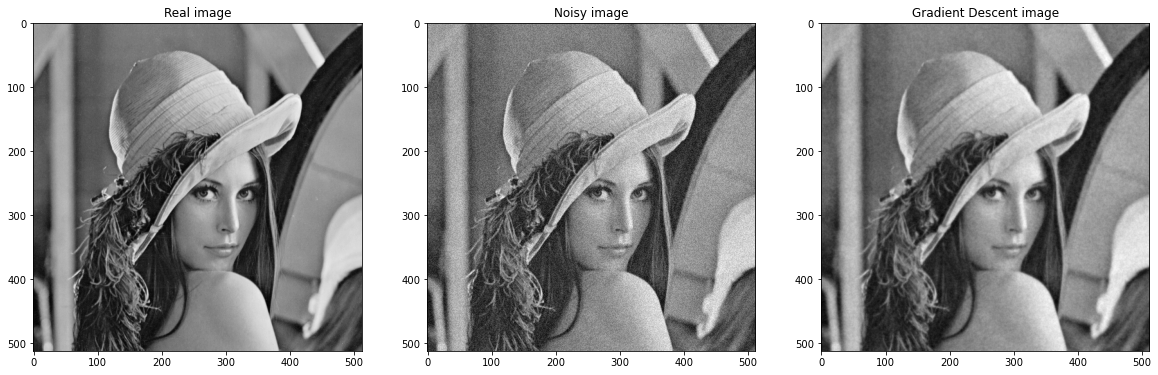

In [76]:
# Show the different images
fig, (ax1, ax2, ax3) = plt.subplots(nrows = 1, ncols = 3, figsize = (20, 12))
ax1.imshow(image_real, cmap = "gray")
ax1.set_title("Real image")
ax2.imshow(image_noisy, cmap = "gray")
ax2.set_title("Noisy image")
ax3.imshow(image_gd, cmap = "gray")
ax3.set_title("Gradient Descent image")

Text(0.5, 1.0, 'Absolute error: real image vs denoised')

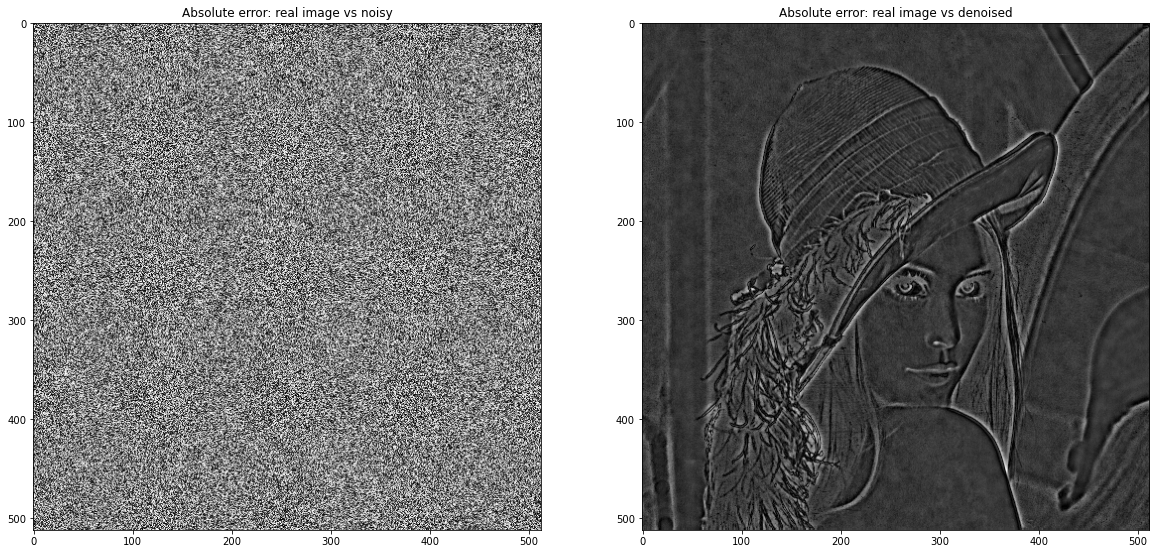

In [33]:
# Show the absolute error among images
noise = abs(image_real - image_noisy)
denoised = abs(image_gd - image_real)

# Plot
fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (20, 12))
ax1.imshow(noise, cmap = "gray")
ax1.set_title("Absolute error: real image vs noisy")
ax2.imshow(denoised, cmap = "gray")
ax2.set_title("Absolute error: real image vs denoised")

Text(0.5, 1.0, 'method noise')

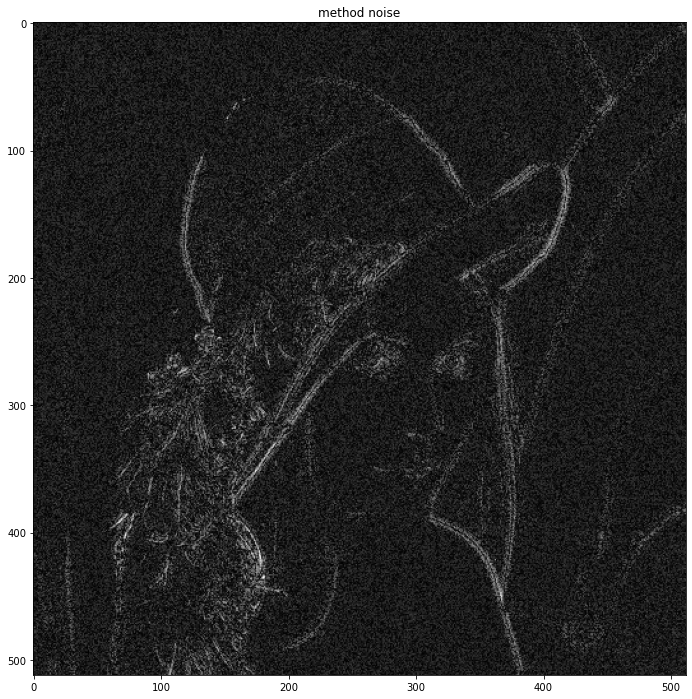

In [34]:
plt.figure(figsize = (20, 12))
plt.imshow(abs(image_gd - image_noisy), cmap = "gray")
plt.title('method noise')